# Segmentation of Indian Traffic

In [ ]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

<pre>
1. Data details-

|--- data
|-----| ---- images
|-----| ------|----- Scene 1
|-----| ------|--------| ----- Frame 1 (image 1)
|-----| ------|--------| ----- Frame 2 (image 2)
|-----| ------|--------| ----- ...
|-----| ------|----- Scene 2
|-----| ------|--------| ----- Frame 1 (image 1)
|-----| ------|--------| ----- Frame 2 (image 2)
|-----| ------|--------| ----- ...
|-----| ------|----- .....
|-----| ---- masks
|-----| ------|----- Scene 1
|-----| ------|--------| ----- json 1 (labeled objects in image 1)
|-----| ------|--------| ----- json 2 (labeled objects in image 1)
|-----| ------|--------| ----- ...
|-----| ------|----- Scene 2
|-----| ------|--------| ----- json 1 (labeled objects in image 1)
|-----| ------|--------| ----- json 2 (labeled objects in image 1)
|-----| ------|--------| ----- ...
|-----| ------|----- .....
</pre>

# Task 1: Preprocessing

## 1. Get all the file name and corresponding json files

In [ ]:
!wget --header="Host: doc-00-98-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/folders/1bynkOIXCurhJ9_Y5Q14KWX5yDyCRkKfN" --header="Cookie: AUTH_ufqf679c9s84m8v94dndb0c1l42d162e_nonce=t9mvvo6v9539q" --header="Connection: keep-alive" "https://doc-00-98-docs.googleusercontent.com/docs/securesc/cjm3fambk0lkqkbuqmm5ghfps1li7j9b/24dm4hu6khil3gmsbba7j9jle9d52see/1595386650000/00484516897554883881/14265967465260034040/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&authuser=0&nonce=t9mvvo6v9539q&user=14265967465260034040&hash=rfq7u3j3uk3f5flff5kd12uav2si9udc" -c -O 'data.zip'

--2020-07-22 02:58:27--  https://doc-00-98-docs.googleusercontent.com/docs/securesc/cjm3fambk0lkqkbuqmm5ghfps1li7j9b/24dm4hu6khil3gmsbba7j9jle9d52see/1595386650000/00484516897554883881/14265967465260034040/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&authuser=0&nonce=t9mvvo6v9539q&user=14265967465260034040&hash=rfq7u3j3uk3f5flff5kd12uav2si9udc
Resolving doc-00-98-docs.googleusercontent.com (doc-00-98-docs.googleusercontent.com)... 64.233.184.132, 2a00:1450:400c:c0b::84
Connecting to doc-00-98-docs.googleusercontent.com (doc-00-98-docs.googleusercontent.com)|64.233.184.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip                [<=>                 ]   2.18G  53.4MB/s    in 38s     

2020-07-22 02:59:06 (58.5 MB/s) - ‘data.zip’ saved [2339740971]



In [ ]:
!unzip /content/data.zip

In [ ]:
import os
import pandas as pd
def return_file_names_df(root_dir):
    # write the code that will create a dataframe with two columns ['images', 'json']
    # the column 'image' will have path to images
    # the column 'json' will have path to json files
    images_complete_list=[]
    json_complete_list=[]

    images_list=os.listdir('/content/data/images')
    images_list.sort()
    json_list=os.listdir('/content/data/mask')
    json_list.sort()
    for i in range(len(images_list)):
      a=os.listdir("/content/data/images/"+str(images_list[i]))
      b=os.listdir('/content/data/mask/'+str(json_list[i]))
      if str(images_list[i]) =='403' or str(images_list[i])=='426' or str(images_list[i]) =='422' or str(images_list[i])=='421'or str(images_list[i])=='417' or str(images_list[i])=='416' :
        a.sort(key= lambda x : int(x[:-16]))
      else:
        a.sort(key= lambda x : int(x[5:-16]))
      if str(json_list[i]) =='403' or str(json_list[i])=='426' or str(json_list[i]) =='422' or str(json_list[i])=='421'or str(json_list[i])=='417' or str(json_list[i])=='416' :
        b.sort(key= lambda x : int(x[:-21]))
      else:
        b.sort(key= lambda x : int(x[5:-21]))
      for a1 in a:
         images_complete_list.append('data/images/'+str(images_list[i])+'/'+a1)
      for b1 in b:
          json_complete_list.append('data/mask/'+str(json_list[i])+'/'+b1)

    data_df=pd.DataFrame()
    data_df['images']=images_complete_list
    data_df['json'] = json_complete_list
    return data_df

In [ ]:
data_df = return_file_names_df('root_dir')
data_df.head()

,images,json
0,data/images/201/frame0029_leftImg8bit.jpg,data/mask/201/frame0029_gtFine_polygons.json
1,data/images/201/frame0299_leftImg8bit.jpg,data/mask/201/frame0299_gtFine_polygons.json
2,data/images/201/frame0779_leftImg8bit.jpg,data/mask/201/frame0779_gtFine_polygons.json
3,data/images/201/frame1019_leftImg8bit.jpg,data/mask/201/frame1019_gtFine_polygons.json
4,data/images/201/frame1469_leftImg8bit.jpg,data/mask/201/frame1469_gtFine_polygons.json


> If you observe the dataframe, we can consider each row as single data point, where first feature is image and the second feature is corresponding json file

In [ ]:

def grader_1(data_df):
    for i in data_df.values:
        if not (path.isfile(i[0]) and path.isfile(i[1]) and i[0][12:i[0].find('_')]==i[1][10:i[1].find('_')]):
          
            return False
    return True

In [ ]:
grader_1(data_df)

True

In [ ]:
data_df.shape

(4008, 2)

## 2. Structure of sample Json file

<img src='https://i.imgur.com/EfR5KmI.png' width="200" height="100">

* Each File will have 3 attributes
    * imgHeight: which tells the height of the image
    * imgWidth: which tells the width of the image
    * objects: it is a list of objects, each object will have multiple attributes,
        * label: the type of the object
        * polygon: a list of two element lists, representing the coordinates of the polygon

#### Compute the unique labels

Let's see how many unique objects are there in the json file.


In [ ]:
import json

def return_unique_labels(data_df):
  unique_labels=[]
  for i in data_df['json']:
    f = open(i,)
    data=json.load(f)
    a=data['objects']
    for k in range(len(a)):
      unique_labels.append(a[k]['label'])
  unique_labels=set(unique_labels)
  unique_labels=list(unique_labels)
  print(len(unique_labels))
 
    # for each file in the column json
    #       read and store all the objects present in that file
    # compute the unique objects and retrun them
    # if open any json file using any editor you will get better sense of it
  return unique_labels

In [ ]:
unique_labels = return_unique_labels(data_df)

40


<img src='https://i.imgur.com/L4QH6Tp.png'>

In [ ]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [ ]:
def grader_2(unique_labels):
    if (not (set(label_clr.keys())-set(unique_labels))) and len(unique_labels) == 40:
        print("True")
    else:
        print("Flase")

grader_2(unique_labels)

True


In [ ]:
new_label_clr = {'road':10, 'parking/drivable fallback':20,'sidewalk':30,'non-drivable fallback/rail track':40,\
                        'person/animal':50, 'rider':60, 'motorcycle/bicycle':70, 'autorickshaw/car':80,\
                        'truck/bus/vehicle fallback/trailer/caravan':90,\
                        'curb/wall':100, 'fence/guard rail':110, 'billboard/traffic sign/traffic light':120,\
                        'pole/polegroup/obs-str-bar-fallback':130,'building/bridge/tunnel':140,\
                        'vegetation':150, 'sky/fallback background':160,'unlabeled/out of roi':0,\
                        'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [ ]:
len(new_label_clr)

21

In [ ]:
f = open('/content/data/mask/201/frame1469_gtFine_polygons.json',)
label=[]
vertexlist=[]
data=json.load(f)
w=data['imgWidth']
h=data['imgHeight']
for i in range(len(data['objects'])):
    label.append(data['objects'][i]['label'])
    local_list=[]
    for k in data['objects'][i]['polygon']:
      local_list.append(tuple(k))
    vertexlist.append(local_list)
print(label)
print(vertexlist)

['sky', 'road', 'drivable fallback', 'drivable fallback', 'non-drivable fallback', 'non-drivable fallback', 'building', 'building', 'fallback background', 'obs-str-bar-fallback', 'motorcycle', 'building', 'building', 'motorcycle', 'wall', 'obs-str-bar-fallback', 'vegetation', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'person', 'car', 'obs-str-bar-fallback', 'vegetation', 'vegetation', 'vegetation', 'vegetation', 'vegetation', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'obs-str-bar-fallback', 'vehicle fallback', 'pole', 'building', 'wall', 'building', 'wall', 'wall', 'vegetation', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'pole', 'vegetation', 'wall', 'pole', 'pole', 'vegetation', 'pole', 'pole', 'obs-str-bar-fallback', 'obs-str-bar-fallback', 'wall', 'motorcycle', 'rider', 'curb', 'pole', 'obs-str-bar-fallback', 'pole', 'obs-str-bar-fallback', 'obs-str-bar-fallback', 'pole', 'obs-str-bar-fallback', 'pole',

<pre>
* here we have given a number for each of object types, if you see we are having 21 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [ ]:
def get_poly(file):
    label=[]
    vertexlist=[]
    # this function will take a file name as argument
    f = open(file,)
    data=json.load(f)
    w=data['imgWidth']
    h=data['imgHeight']
    for i in range(len(data['objects'])):
        label.append(data['objects'][i]['label'])
        local_list=[]
        for k in data['objects'][i]['polygon']:
            local_list.append(tuple(k))
        vertexlist.append(local_list)
        

    return w, h, label, vertexlist

In [ ]:
def grader_3(file):
    w, h, labels, vertexlist = get_poly(file)
    print(len((set(labels)))==18 and len(vertexlist)==227 and w==1920 and h==1080 \
          and isinstance(vertexlist,list) and isinstance(vertexlist[0],list) and isinstance(vertexlist[0][0],tuple) )

grader_3('data/mask/201/frame0029_gtFine_polygons.json')

True


## 4. Creating Image segmentations by drawing set of polygons

### Example

(28, 28, 3)
[[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 

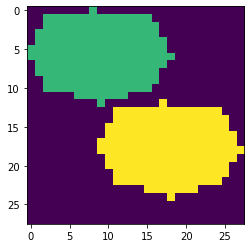

In [ ]:
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath  
side=8
x1 = [ ((math.cos(th) + 1) *9, (math.sin(th) + 1) * 6) for th in [i * (2 * math.pi) / side for i in range(side)] ]
x2 = [ ((math.cos(th) + 2) *9, (math.sin(th) + 3) *6) for th in [i * (2 * math.pi) / side for i in range(side)] ]

img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)

img1.polygon(x1, fill =20)
# writing the second polygon
img1.polygon(x2, fill =30)

img=np.array(img)
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])
im.save("test_image.png")

In [ ]:
def compute_masks(data_df):
    mask=[]
    for i in range(len(data_df['json'])):
        w,h,label,vertexlist = get_poly(data_df['json'].iloc[i])
        a=data_df['json'].iloc[i]
        

        img = Image.new("RGB", (w, h))
        img1 = ImageDraw.Draw(img)
        for j in range(len(label)):
            if(len(vertexlist[j])<=1):
                pass
            else: 
                img1.polygon(vertexlist[j], fill = label_clr[label[j]])
        img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here

        im = Image.fromarray(img[:,:,0])
        if(os.path.isdir('data/output/'+ str(a[10:13]))):
            im.save('data/output/'+str(a[10:13])+'/'+a[14:-21]+'_gtFine_polygons.png')
        else:
            os.makedirs('data/output/'+str(a[10:13]))
            im.save('data/output/'+str(a[10:13])+'/'+a[14:-21]+'_gtFine_polygons.png')
    # after drawing all the polygons that we collected from json file, 
    # you need to store that image in the folder like this "data/output/scene/framenumber_gtFine_polygons.png"
        mask.append('data/output/'+str(a[10:13])+'/'+a[14:-21]+'_gtFine_polygons.png')
    data_df['mask'] =mask

    
    return data_df

In [ ]:
data_df = compute_masks(data_df)
data_df.head()

,images,json,mask
0,data/images/201/frame0029_leftImg8bit.jpg,data/mask/201/frame0029_gtFine_polygons.json,data/output/201/frame0029_gtFine_polygons.png
1,data/images/201/frame0299_leftImg8bit.jpg,data/mask/201/frame0299_gtFine_polygons.json,data/output/201/frame0299_gtFine_polygons.png
2,data/images/201/frame0779_leftImg8bit.jpg,data/mask/201/frame0779_gtFine_polygons.json,data/output/201/frame0779_gtFine_polygons.png
3,data/images/201/frame1019_leftImg8bit.jpg,data/mask/201/frame1019_gtFine_polygons.json,data/output/201/frame1019_gtFine_polygons.png
4,data/images/201/frame1469_leftImg8bit.jpg,data/mask/201/frame1469_gtFine_polygons.json,data/output/201/frame1469_gtFine_polygons.png


In [ ]:
data_df = compute_masks(data_df)
data_df.head()

,images,json,mask
0,data/images/201/frame0029_leftImg8bit.jpg,data/mask/201/frame0029_gtFine_polygons.json,data/output/201/frame0029_gtFine_polygons.png
1,data/images/201/frame0299_leftImg8bit.jpg,data/mask/201/frame0299_gtFine_polygons.json,data/output/201/frame0299_gtFine_polygons.png
2,data/images/201/frame0779_leftImg8bit.jpg,data/mask/201/frame0779_gtFine_polygons.json,data/output/201/frame0779_gtFine_polygons.png
3,data/images/201/frame1019_leftImg8bit.jpg,data/mask/201/frame1019_gtFine_polygons.json,data/output/201/frame1019_gtFine_polygons.png
4,data/images/201/frame1469_leftImg8bit.jpg,data/mask/201/frame1469_gtFine_polygons.json,data/output/201/frame1469_gtFine_polygons.png


True
[  0  10  20  40  50  60  70  80  90 100 120 130 140 150 160]
[  0  10  20  40  50  60  70  80  90 100 120 130 140 150 160]


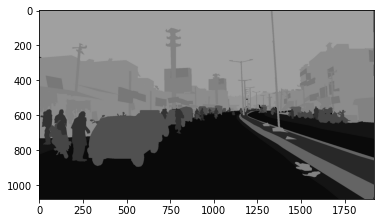

In [ ]:
def grader_3():
    url = "https://i.imgur.com/4XSUlHk.png"
    url_response = urllib.request.urlopen(url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    my_img = cv2.imread('data/output/201/frame0029_gtFine_polygons.png')    
    plt.imshow(my_img)
    print((my_img[:,:,0]==img).all())
    print(np.unique(img))
    print(np.unique(my_img[:,:,0]))
    data_df.to_csv('preprocessed_data.csv', index=False)
grader_3()

In [ ]:
!pip install -U segmentation-models==1.0.1

Requirement already up-to-date: segmentation-models==1.0.1 in /usr/local/lib/python3.6/dist-packages (1.0.1)


# Task 3: Training CANet

In [ ]:
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Multiply
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


* You can devide the whole architecture can be devided into two parts
    1. Encoder
    2. Decoder
    <img src='https://i.imgur.com/prH3Mno.png' width="600">
* Encoder:
    * The first step of the encoder is to create the channel maps [$C_1$, $C_2$, $C_3$, $C_4$]
    * $C_1$ width and heigths are 4x times less than the original image
    * $C_2$ width and heigths are 8x times less than the original image
    * $C_3$ width and heigths are 8x times less than the original image
    * $C_4$ width and heigths are 8x times less than the original image
    * <i>you can reduce the dimensions by using stride parameter</i>.
    * [$C_1$, $C_2$, $C_3$, $C_4$] are formed by applying a "conv block" followed by $k$ number of "identity block". i.e the $C_k$ feature map will single "conv block" followed by $k$ number of "identity blocks".
    <table>
    <tr><td><img src="https://i.imgur.com/R8Gdypo.png" width="300"></td>
        <td><img src="https://i.imgur.com/KNunjQK.png" width="250"></td></tr>
    </table>
    * <strong>The conv block and identity block of $C_1$</strong>: the number filters in the covolutional layers will be $[4,4,8]$ and the number of filters in the parallel conv layer will also be $8$.
    * <strong>The conv block and identity block of $C_2$</strong>: the number filters in the covolutional layers will be $[8,8,16]$ and the number of filters in the parallel conv layer will also be $16$.
    * <strong>The conv block and identity block of $C_3$</strong>: the number filters in the covolutional layers will be $[16,16,32]$ and the number of filters in the parallel conv layer will also be $32$.
    * <strong>The conv block and identity block of $C_4$</strong>: the number filters in the covolutional layers will be $[32,32,64]$ and the number of filters in the parallel conv layer will also be $64$.
    * Here $\oplus$ represents the elementwise sum
    <br>
    

    
    * Example: if your image is of size $(512, 512, 3)$
        * the output after $C_1$ will be $128*128*8$
        * the output after $C_2$ will be $64*64*16$
        * the output after $C_3$ will be $64*64*32$
        * the output after $C_4$ will be $64*64*64$

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data_df, test_size=0.10, random_state=42)

In [ ]:
def visualize(**images):
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        if i==1:
            plt.imshow(image, cmap='gray', vmax=1, vmin=0)
        else:
            plt.imshow(image)
    plt.show()

class Dataset:
    # we will be modifying this CLASSES according to your data/problems
    new_label_clr = {'road':10, 'parking/drivable fallback':20,'sidewalk':30,'non-drivable fallback/rail track':40,\
                        'person/animal':50, 'rider':60, 'motorcycle/bicycle':70, 'autorickshaw/car':80,\
                        'truck/bus/vehicle fallback/trailer/caravan':90,\
                        'curb/wall':100, 'fence/guard rail':110, 'billboard/traffic sign/traffic light':120,\
                        'pole/polegroup/obs-str-bar-fallback':130,'building/bridge/tunnel':140,\
                        'vegetation':150, 'sky/fallback background':160,'unlabeled/out of roi':0,\
                        'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}
    # the parameters needs to changed based on your requirements
    # here we are collecting the file_names because in our dataset, both our images and maks will have same file name
    # ex: fil_name.jpg   file_name.mask.jpg
    def __init__(self, images_dir, file_names):
        new_label_clr = {'road':10, 'parking/drivable fallback':20,'sidewalk':30,'non-drivable fallback/rail track':40,\
                        'person/animal':50, 'rider':60, 'motorcycle/bicycle':70, 'autorickshaw/car':80,\
                        'truck/bus/vehicle fallback/trailer/caravan':90,\
                        'curb/wall':100, 'fence/guard rail':110, 'billboard/traffic sign/traffic light':120,\
                        'pole/polegroup/obs-str-bar-fallback':130,'building/bridge/tunnel':140,\
                        'vegetation':150, 'sky/fallback background':160,'unlabeled/out of roi':0,\
                        'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}
        
        # the paths of images
        self.images_fps   = images_dir
        # the paths of segmentation images
        self.masks_fps    = file_names
        # giving labels for each class
        self.class_values = list(new_label_clr.values())
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED)
        image =cv2.resize(image,(512,512))
        mask  = cv2.imread(self.masks_fps[i], cv2.IMREAD_UNCHANGED)
        image_mask =cv2.resize(mask,(512,512))
      
        
        image_masks = [(image_mask == v) for v in self.class_values]
        image_mask = np.stack(image_masks, axis=-1).astype('float')

            
        return image, image_mask
        
    def __len__(self):
        return len(self.images_fps)
    
    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [ ]:
# we are importing the pretrained unet from the segmentation models
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
#from segmentation_models import Unet
# sm.set_framework('tf.keras')
tf.keras.backend.set_image_data_format('channels_last')

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [ ]:
class convolutional_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3,  filters=[4,4,8], stride=2,name='Conv_block'):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.stride = stride
    
        self.batch1=BatchNormalization(axis = 3)
        self.conv1 = Conv2D(filters = self.F1, kernel_size = (1,1), strides = (self.stride, self.stride) ,padding = 'same')
        self.active1=Activation('relu')

        self.conv2=Conv2D(filters = self.F2, kernel_size = (3,3), strides = (1,1), padding = 'same')
        self.batch2 = BatchNormalization(axis = 3)
        self.active2 = Activation('relu')

        self.conv3=Conv2D(filters = self.F3, kernel_size = (1, 1), strides = (1,1), padding = 'same')
        self.batch3 = BatchNormalization(axis = 3)

        self.conv4 = Conv2D(filters = self.F3, kernel_size = (3, 3), strides = (self.stride, self.stride), padding = 'same')
        self.batch4 = BatchNormalization(axis = 3)
        self.active4 = Activation('relu')
        self.add=Add()
        self.active5=Activation('relu')

    def call(self, X):
         
         X_direct=X
    # First component of main path
         X = self.conv1(X)
         X = self.batch1(X)
         X = self.active1(X)

    # Second component of main path (≈3 lines)
         X =self.conv2(X)
         X = self.batch2(X)
         X = self.active2(X)

    # Third component of main path (≈2 lines)
         X = self.conv3(X)
         X = self.batch3(X)

         X_direct = self.conv4(X_direct)
         X_direct = self.batch4(X_direct)
         X_direct = self.active4(X_direct)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
         X = self.add([X, X_direct])
         X = self.active5(X)
    
    
         return X

In [ ]:
class identity_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3,  filters=[4,4,8],name='identity_block'):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.conv1=Conv2D(filters = self.F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')
        self.batch1=BatchNormalization(axis = 3)
        self.active1=Activation('relu')

        self.conv2=Conv2D(filters = self.F2, kernel_size = (3,3), strides = (1,1), padding = 'same')
        self.batch2 = BatchNormalization(axis = 3)
        self.active2 = Activation('relu')

        self.conv3=Conv2D(filters = self.F3, kernel_size = (1, 1), strides = (1,1),padding = 'valid')
        self.batch3=BatchNormalization(axis = 3)
        self.add=Add()
        self.active3=Activation('relu')
    def call(self, X):
    
  
        X_direct=X
    # First component of main path
        X = self.conv1(X)
        X = self.batch1(X)
        X = self.active1(X)

    # Second component of main path (≈3 lines)
        X = self.conv2(X)
        X = self.batch2(X)
        X = self.active2(X)

    # Third component of main path (≈2 lines)
        X = self.conv3(X)
        X = self.batch3(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
        X = self.add([X, X_direct])
        X = self.active3(X)
    
    
        return X
       

* The output of the $C_4$ will be passed to $\text{Chained Context Aggregation Module (CAM)}$
<img src='https://i.imgur.com/Bu63AAA.png' width="400">
* The CAM module will have two operations names Context flow and Global flow
* <strong>The Global flow</strong>: 
    * as shown in the above figure first we willl apply  <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D">global avg pooling</a> which results in (#, 1, 1, number_of_filters) then applying <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization?version=nightly">BN</a>, <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU">RELU</a>, $1*1 \text{ Conv}$ layer sequentially which results a matrix (#, 1, 1, number_of_filters). Finally apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> / <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose">conv2d transpose</a> to make the output same as the input dimensions (#, input_height, input_width, number_of_filters)
    * If you use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> then use bilinear pooling as interpolation technique
* <strong>The Context flow</strong>: 
    * as shown in the above figure (c) the context flow will get inputs from two modules `a. C4` `b. From the above flow` 
    * We will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate">concatinating</a> the both inputs on the last axis.
    * After the concatination we will be applying <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D"> Average pooling </a> which reduces the size of feature map by $N\times$ times
    * In the paper it was mentioned that to apply a group convolutions, but for the assignment we will be applying the simple conv layers with kernel size $(3*3)$
    * We are skipping the channel shuffling 
    * similarly we will be applying a simple conv layers with kernel size $(3*3)$ consider this output is X
    * later we will get the Y=(X $\otimes \sigma((1\times1)conv(relu((1\times1)conv(X))))) \oplus X$, here $\oplus$ is elementwise addition and $\otimes$ is elementwise multiplication
    * Finally apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> / <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose">conv2d transpose</a> to make the output same as the input dimensions (#, input_height, input_width, number_of_filters)
    * If you use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> then use bilinear pooling as interpolation technique

NOTE: here N times reduction and N time increments makes the input and out shape same, you can explore with the N values, you can choose N = 2 or 4

* Example with N=2:
    * Assume the C4 is of shape (64,64,64) then the shape of GF will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of GF is (64,64,32) then the shape of CF1 will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of CF1 is (64,64,32) then the shape of CF2 will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of CF2 is (64,64,32) then the shape of CF3 will be (64,64,32)

In [ ]:
class global_flow(tf.keras.layers.Layer):
    def __init__(self, name="global_flow"):
        super().__init__(name=name)
        self.global1=GlobalAveragePooling2D()
        self.batch1=BatchNormalization(axis=3)
        self.active1=Activation('relu')
        self.conv1=Conv2D(32, (1, 1), activation = 'relu', padding = 'valid', name = 'GF_conv1',strides=1)
        self.con=(Conv2DTranspose(32 ,(64,64), use_bias = False))
    def call(self, X):
        x_GF = self.global1(X)                       #Global Average pooling changes the dimensions of the output. Instead use average   
        x_GF=tf.reshape(x_GF,shape=(-1,1,1,X.shape[1]))
        x_GF2 = self.batch1(x_GF)                               # pooling with the kernal dimensions equal to that of the entire layer
        x_GF3 = self.active1(x_GF2) 
        #print(x_GF3.shape)   
        GF_Conv_1 = self.conv1(x_GF3)
        #print(GF_Conv_1.shape)
        GF_Conv_T = self.con(GF_Conv_1)
        #print(GF_Conv_1.shape)
        return GF_Conv_T

In [ ]:
class context_flow(tf.keras.layers.Layer):    
    def __init__(self, name="context_flow"):
        super().__init__(name=name)
        self.con1=Concatenate()
        self.global1= GlobalAveragePooling2D()
        
        self.conv1 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'CF1_conv1' )
        self.conv2 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'CF1_conv2')
        self.conv3 = Conv2D(32, (1, 1), activation = 'relu', padding = 'same', name = 'CF1_conv3' )
        self.active1 = Activation('relu')
        self.conv4 = Conv2D(32, (1, 1), activation = 'relu', padding = 'same', name = 'CF1-conv4' )
        self.active2 = Activation('sigmoid')
        self.multi = Multiply()
        self.add = Add()
        self.conv5 = (Conv2DTranspose(32 ,  (64,64), use_bias = False ))

    def call(self,X):
        x1,GF_Conv_T=X
        c1 = self.con1([x1,GF_Conv_T])
        CF_x1 = self.global1(c1)
        CF_x1=tf.reshape(CF_x1,shape=(-1,1,1,CF_x1.shape[1]))
        CF_Conv_11 = self.conv1(CF_x1)
        CF_Conv_12 = self.conv2(CF_Conv_11)
        CF_Conv_13 = self.conv3(CF_Conv_12)
        CF_x2 = self.active1(CF_Conv_13)
        CF_Conv_14 = self.conv4(CF_x2)
        CF_x3 = self.active2(CF_Conv_14)
        CF_x4 = self.multi([CF_Conv_12 , CF_Conv_14])
        CF_x5 = self.add([CF_Conv_12,CF_x4])
        CF_Conv_T1 = self.conv5(CF_x5) 

 
        #INP, FLOW = X[0], X[1] 
        # implement the context flow as mentioned in the above cell
        return CF_Conv_T1

* As shown in the above architecture we will be having 4 context flows
* if you have implemented correctly all the shapes of Global Flow, and 3 context flows will have the same dimension
* the output of these 4 modules will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">added</a> to get the same output matrix
<img src='https://i.imgur.com/Bu63AAA.png' width="400">
 * The output of after the sum, will be sent to the <strong>Feature selection module $FSM$</strong>
 
* Example:
    * if the shapes of GF, CF1, CF2, CF3 are (64,64,32), (64,64,32), (64,64,32), (64,64,32), (64,64,32) respectivly then after the sum we will be getting (64,64,32), which will be passed to the next module.
 
<strong>Feature selection module</strong>:

* As part of the FSM we will be applying a conv layer (3,3) with the padding="same" so that the output and input will have same shapes
* Let call the output as X
* Pass the X to global pooling which results the matrix (#, 1, 1, number_of_channels)
* Apply $1*1$ conv layer, after the pooling
* the output of the $1*1$ conv layer will be passed to the Batch normalization layer, followed by Sigmoid activation function.
* we will be having the output matrix of shape (#, 1, 1, number_of_channels) lets call it 'Y'
* <strong>we can interpret this as attention mechanisum, i.e for each channel we will having a weight</strong>
* the dimension of X (#, w, h, k) and output above steps Y is (#, 1, 1, k) i.e we need to multiply each channel of X will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Multiply">multiplied</a> with corresponding channel of Y
* After creating the weighted channel map we will be doing upsampling such that it will double the height and width.
* apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> with bilinear pooling as interpolation technique

* <font color="red">Example</font>:
    * Assume the matrix shape of the input is (64,64,32) then after upsampling it will be (128,128,32)

In [ ]:
class fsm(tf.keras.layers.Layer):    
    def __init__(self, name="feature_selection"):
        super().__init__(name=name)
        self.conv1=Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'Fsm_conv_1')
        self.global1=GlobalAveragePooling2D()
        self.conv2=Conv2D(32, (1, 1), activation = 'relu', padding = 'same', name = 'Fsm_conv_2')
        self.batch1= BatchNormalization()
        self.active1=Activation('sigmoid')
        self.multi=Multiply()
        self.fsm=UpSampling2D(size=(2,2),interpolation='bilinear')
    def call(self, X):
        # implement the FSM modules based on image in the above cells
        

        x = self.conv1(X)
        g_x = self.global1(x)
        CF_x1=tf.reshape(g_x,shape=(-1,1,1,g_x.shape[1]))
        
        Fsm_Conv_2 = self.conv2(CF_x1)
        bn =self.batch1(Fsm_Conv_2)
        s = self.active1(bn)

        x_1 = self.multi([x,s])
        #print(x_1.shape)
        #Fsm_conv_T = Conv2DTranspose(32 ,  (64,64), use_bias = False)(x_1)
        Fsm_conv_T=self.fsm(x_1)
        
        
        return Fsm_conv_T

* <b>Adapted Global Convolutional Network (AGCN)</b>:
    <img src="https://i.imgur.com/QNB8RmV.png" width="300">
    
    * AGCN will get the input from the output of the "conv block" of $C_1$
    
    * In all the above layers we will be using the padding="same" and stride=(1,1)
    
    * so that we can have the input and output matrices of same size
    
* <font color="red">Example</font>:
    * Assume the matrix shape of the input is (128,128,32) then the output it will be (128,128,32)

In [ ]:
class agcn(tf.keras.layers.Layer):    
    def __init__(self, name="global_conv_net"):
        super().__init__(name=name)
        self.conv1=Conv2D(32, (7, 1), activation = 'relu', padding = 'same', name = 'AG_conv1' )
        self.conv2=Conv2D(32, (1, 7), activation = 'relu', padding = 'same', name = 'AG_conv2')
        self.conv3=Conv2D(32, (1, 7), activation = 'relu', padding = 'same', name = 'AG_conv3' )
        self.conv4=Conv2D(32, (7, 1), activation = 'relu', padding = 'same', name = 'AG_conv4')
        self.add=Add()
        self.conv5=Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'AG_conv5' )
    def call(self, X):
        
        AG_Conv_L1 = self.conv1(X)
        AG_Conv_L2 = self.conv2(X)

        AG_Conv_R1 = self.conv3(AG_Conv_L1)
        AG_Conv_R2 = self.conv4(AG_Conv_L2)

        o2 = self.add([AG_Conv_R1,AG_Conv_R2])

        AG_Conv_F1 = self.conv5(o2)

        o3 = self.add([o2,AG_Conv_F1])
        # please implement the above mentioned architecture
        return o3

*     <img src='https://i.imgur.com/prH3Mno.png' width="600">
* as shown in the architecture, after we get the AGCN it will get concatinated with the FSM output

* If we observe the shapes both AGCN and FSM will have same height and weight

* we will be concatinating both these outputs over the last axis

* The concatinated output will be passed to a conv layers with filters = number of classes in our data set and the activation function = 'relu'

* we will be using padding="same" which results in the same size feature map

* If you observe the shape of matrix, it will be 4x times less than the original image

* to make it equal to the original output shape, we will do 4x times upsampling of rows and columns

* apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> with bilinear pooling as interpolation technique

* Finally we will be applying sigmoid activation.

* Example:
    * Assume the matrix shape of AGCN is (128,128,32)  and FSM is (128,128,32) the concatination will make it (128, 128, 64)
    * Applying conv layer will make it (128,128,21)
    * Finally applying upsampling will make it (512, 512, 21)
    * Applying sigmoid will result in the same matrix (512, 512, 21)

In [ ]:
X_input = Input(shape=(512,512,3))

# Stage 1
X = Conv2D(64, (3, 3), name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X_input)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X=convolutional_block(kernel=3, filters=[4, 4, 8], stride=2,name='Conv_block1')(X)

#global_conv=Conv2D(32, (1, 1), name='global_conv', padding="same", kernel_initializer=glorot_uniform(seed=0))(X)
global_conv_net=agcn(name="global_conv_net")(X)

X=identity_block(kernel=3, filters=[4, 4, 8],name='identity_block1')(X)
X=identity_block(kernel=3, filters=[4, 4, 8],name='identity_block2')(X)
X=identity_block(kernel=3, filters=[4, 4, 8],name='identity_block3')(X)
X=identity_block(kernel=3, filters=[4, 4, 8],name='identity_block4')(X)

X=convolutional_block(kernel=3, filters=[8,8,16], stride=2,name='Conv_block2')(X)
X=identity_block(kernel=3, filters=[8,8,16],name='identity_block5')(X)
X=identity_block(kernel=3, filters=[8,8,16],name='identity_block6')(X)
X=identity_block(kernel=3, filters=[8,8,16],name='identity_block7')(X)

X=convolutional_block(kernel=3, filters=[16,16,32], stride=1,name='Conv_block3')(X)
X=identity_block(kernel=3, filters=[16,16,32],name='identity_block8')(X)
X=identity_block(kernel=3, filters=[16,16,32],name='identity_block9')(X)
X=identity_block(kernel=3, filters=[16,16,32],name='identity_block10')(X)

X=convolutional_block(kernel=3, filters=[32,32,64], stride=1,name='Conv_block4')(X)
X=identity_block(kernel=3, filters=[32,32,64],name='identity_block11')(X)
X=identity_block(kernel=3, filters=[32,32,64],name='identity_block12')(X)
X=identity_block(kernel=3, filters=[32,32,64],name='identity_block13')(X)

GF_Conv_T=global_flow(name='global_flow1')(X)

context_X1=context_flow(name='context_flow1')((X,GF_Conv_T))

context_X2=context_flow(name='context_flow2')((X,context_X1))

context_X3=context_flow(name='context_flow3')((X,context_X2))

Add1 = Add()([GF_Conv_T,context_X1,context_X2,context_X3])

X_fsm=fsm(name='feature_selection')(Add1)

concatted1= concatenate([X_fsm,global_conv_net])

con_final = Conv2D(21, (1,1), activation = 'relu', padding = 'same', name = 'con_final')(concatted1)
    
Upsampling_1  = UpSampling2D(size=(2,2), interpolation = 'bilinear')(con_final)

Upsampling_2  = UpSampling2D(size=(2,2), interpolation = 'bilinear')(Upsampling_1)

model =Model(inputs =X_input,outputs=Upsampling_2)

model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 512, 512, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 512, 512, 64) 0           bn_conv1[0][0]                   
______________________________________________________________________________________________

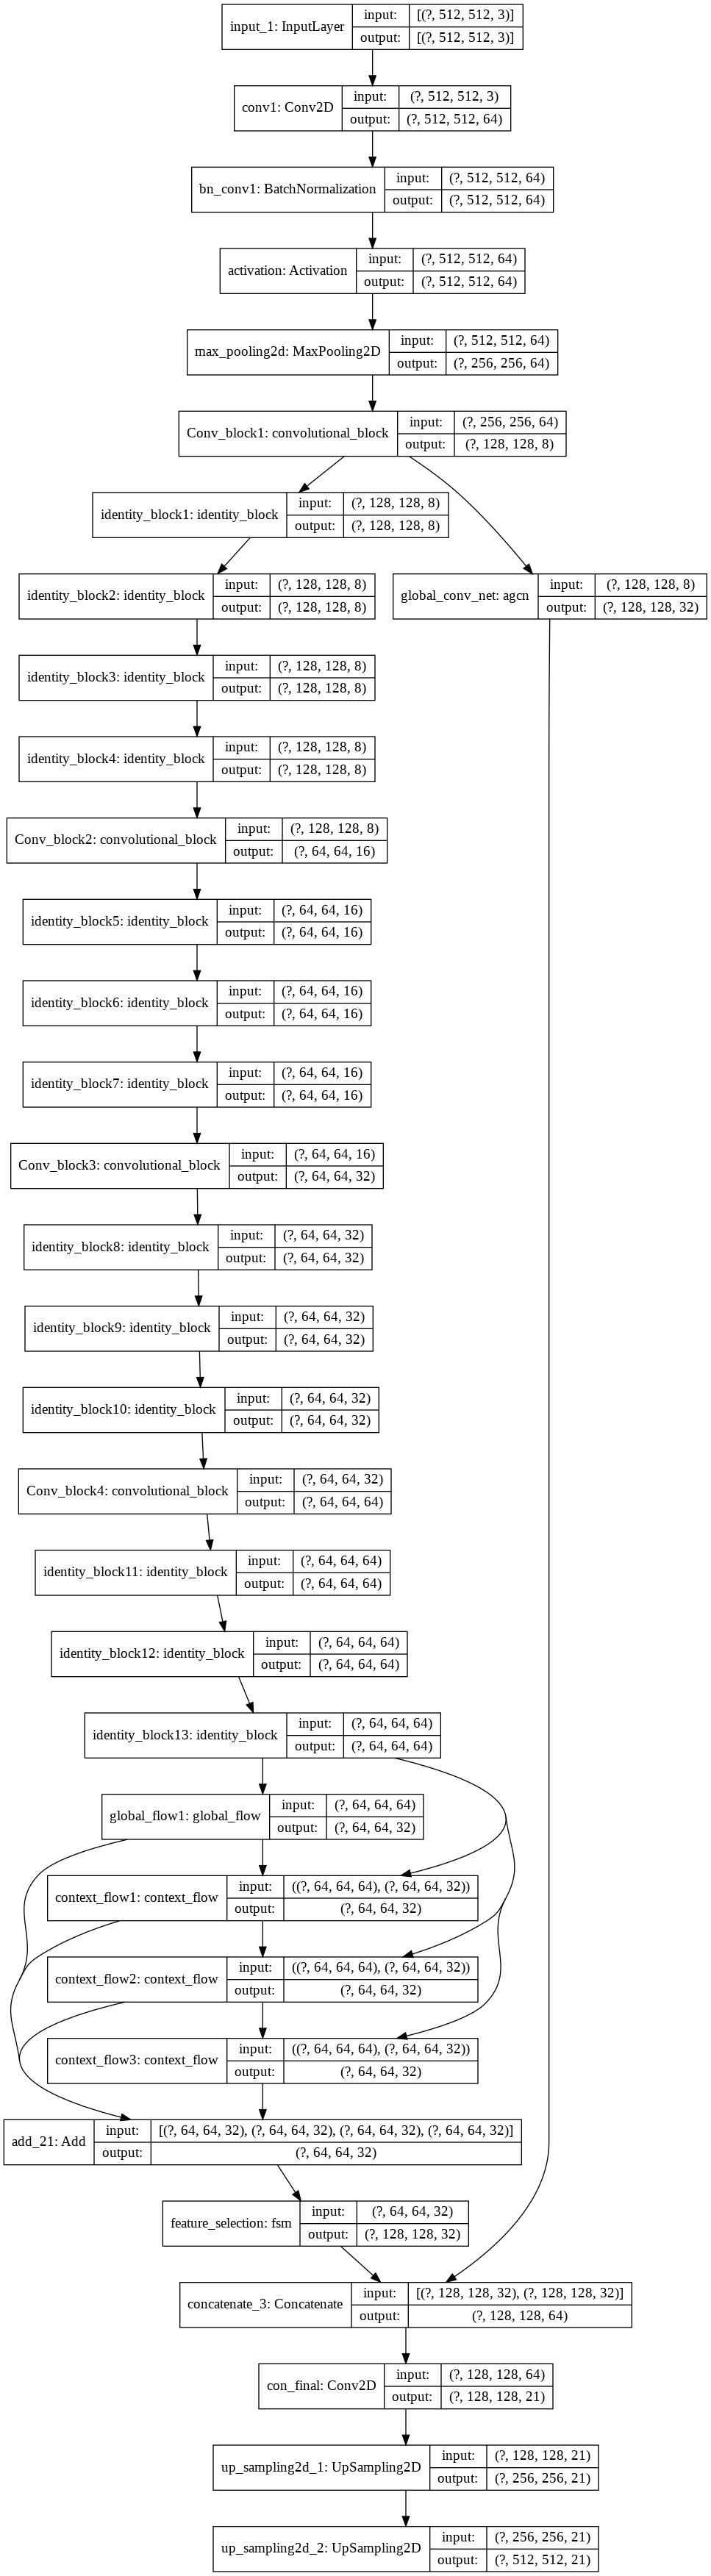

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True,rankdir='TB')

In [ ]:
from keras import backend as K 
def recall1(y_true,y_pred):
  t_p=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
  a_p=K.sum(K.round(K.clip(y_true,0,1)))
  recall=t_p/(a_p + K.epsilon())
  return recall

def precision1(y_true,y_pred):
  t_p=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
  p_p=K.sum(K.round(K.clip(y_pred,0,1)))
  precision = t_p/(p_p +K.epsilon())
  return precision

def f1_keras_score(y_true,y_pred):
  precision =precision1(y_true,y_pred)
  recall = recall1(y_true,y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from segmentation_models import Unet

optim = tf.keras.optimizers.Adam(0.0001)

focal_loss = sm.losses.cce_dice_loss

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss 
# or total_loss = sm.losses.categorical_focal_dice_loss 

model.compile(optim, focal_loss, metrics=[sm.metrics.IOUScore(threshold=0.5),f1_keras_score])


In [ ]:
# Dataset for train images
import keras
BATCH_SIZE=4
train_dataset = Dataset(list(X_train['images']),list(X_train['mask']))
test_dataset  = Dataset(list(X_test['images']),list(X_test['mask']))


train_dataloader = Dataloder(train_dataset, batch_size=4, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=4, shuffle=True)

print(train_dataloader[0][0].shape)
assert train_dataloader[0][0].shape == (BATCH_SIZE, 512, 512, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 512, 512, 21)

# define callbacks for learning rate scheduling and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True, \
                                       mode='min', monitor='val_iou_score')
]

(4, 512, 512, 3)


In [ ]:
history = model.fit_generator(train_dataloader, steps_per_epoch=len(train_dataloader), epochs=15,\
                              validation_data=test_dataloader,callbacks=callbacks )

In [ ]:
import shutil
shutil.copy("/content/best_model.h5",'/content/drive/My Drive/Google Photos')

'/content/drive/My Drive/Google Photos/best_model.h5'

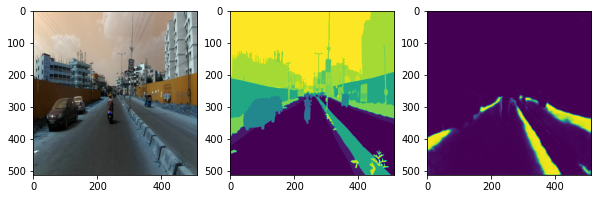

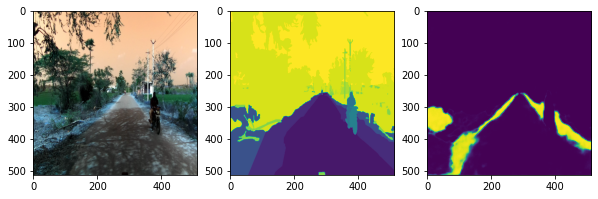

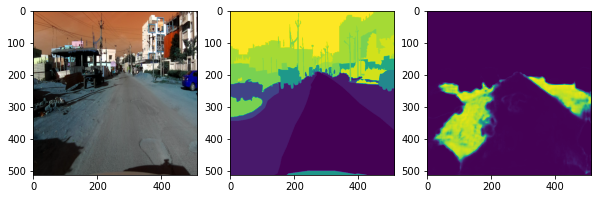

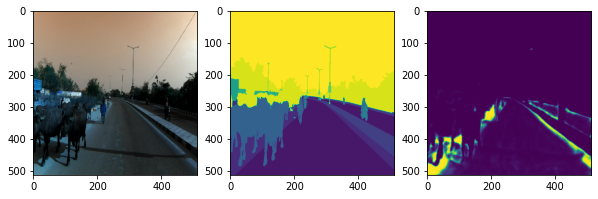

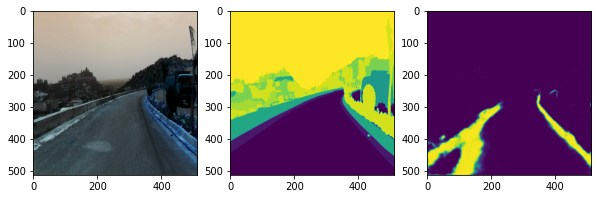

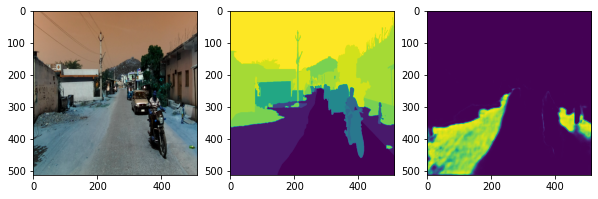

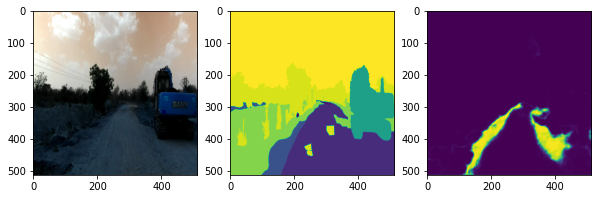

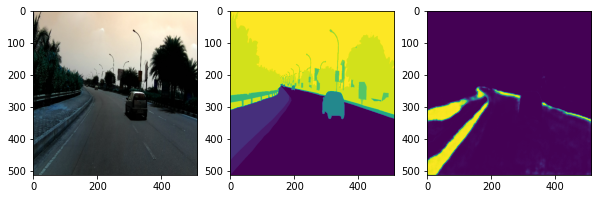

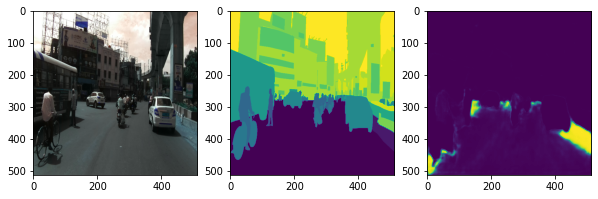

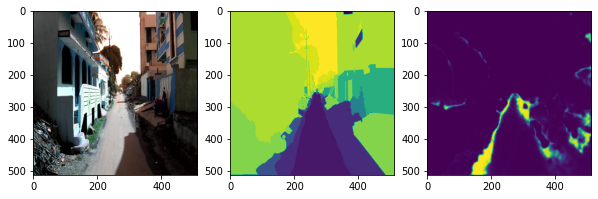

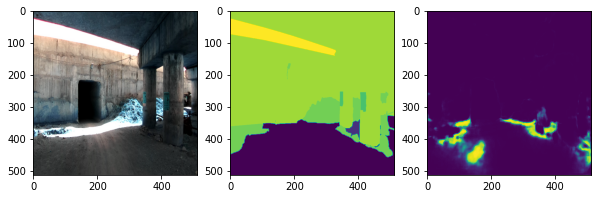

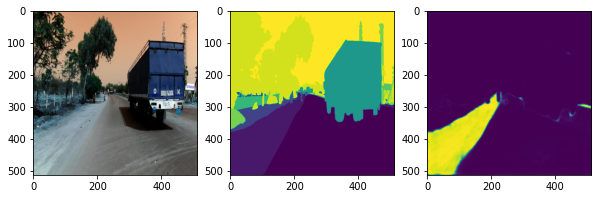

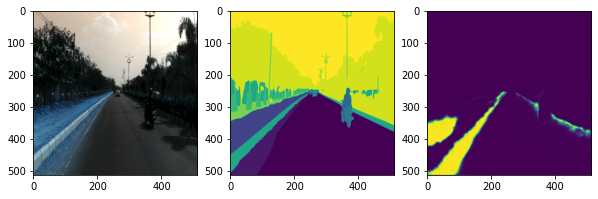

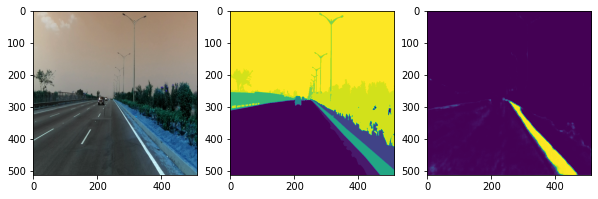

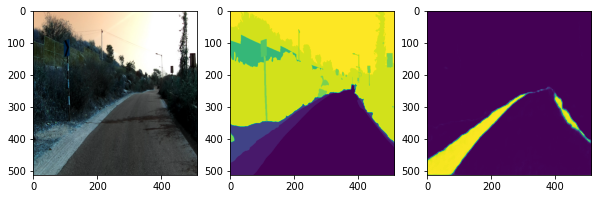

In [ ]:

for p, i in enumerate(X_test['images'].values[0:15]):
    #original image
    image = cv2.imread(i, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (512,512)) 
    
    #predicted segmentation map
    predicted  = model.predict(image[np.newaxis,:,:,:])
    
    #original segmentation map
    image_mask = cv2.imread(X_test['mask'].values[p], 0)
    image_mask = cv2.resize(image_mask, (512,512))
    

    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(image_mask)
    plt.subplot(133)
    z=np.zeros(shape=(512,512),dtype='float32')
    for i in range(len(new_label_clr.values())):
      z+=(predicted[0][:,:,1]*list(new_label_clr.values())[i])
    plt.imshow(z)
    plt.show()

**Conclusion**

1- The val-IOU-Score is around 0.40.

2- CANet is computationally efficient than UNET.

3- In fsm we are using attention mechanism thats the reason it is giving very good results.

